In [2]:
!pip install tensorflow

In [3]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [4]:
print(train_data,train_data.shape)

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list([1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 

In [5]:
train_labels[0]

1

In [6]:
len(train_labels)

25000

In [7]:
len(train_labels)

25000

In [8]:
test_labels[0]

0

In [9]:
max([max(sequence) for sequence in test_data])

9999

In [10]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [11]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

DATA PREPARATION

In [12]:

import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

In [13]:
#Data Vectorization
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [14]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [15]:
x_test[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [16]:
#label vectorization
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [17]:
#Building model using relu and compiling it
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [18]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [19]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [20]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 193ms/step - accuracy: 0.7060 - loss: 0.6118 - val_accuracy: 0.8615 - val_loss: 0.4245
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.8851 - loss: 0.3716 - val_accuracy: 0.8811 - val_loss: 0.3364
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.9178 - loss: 0.2688 - val_accuracy: 0.8636 - val_loss: 0.3329
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.9304 - loss: 0.2179 - val_accuracy: 0.8841 - val_loss: 0.2900
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.9423 - loss: 0.1817 - val_accuracy: 0.8872 - val_loss: 0.2767
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.9565 - loss: 0.1458 - val_accuracy: 0.8866 - val_loss: 0.2784
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9646 - loss: 0.1256 - val_accuracy: 0.8851 - val_loss: 0.2890
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9677 - loss: 0.1110 - val_accuracy: 0.8827 - 

In [21]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

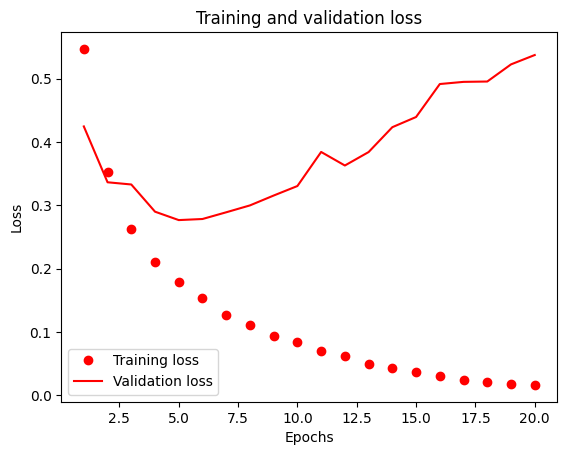

In [22]:
#Plotting the training loss vs validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "ro", label="Training loss")
plt.plot(epochs, val_loss_values, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

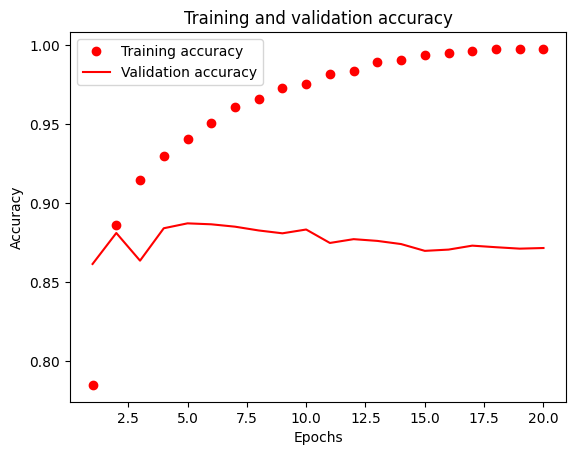

In [23]:
#Plotting training accuracy vs validatition accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "ro", label="Training accuracy")
plt.plot(epochs, val_acc, "r", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

It could need more investigation to enhance the model's performance, such as modifying the hyperparameters or applying regularization strategies.

Model retraining

In [24]:

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.7177 - loss: 0.5883
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8953 - loss: 0.3161
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9176 - loss: 0.2313
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9334 - loss: 0.1921
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8853 - loss: 0.2861


In [25]:
results


[0.2836062014102936, 0.8867200016975403]

#accuracy of 88% on the test dataset. The loss value test is 0.2828.

In [26]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.20125253],
       [0.9989235 ],
       [0.91666836],
       ...,
       [0.12186148],
       [0.09718309],
       [0.64961   ]], dtype=float32)

Constructing a neural network with 1- hidden layer

In [27]:

model_1_layer = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_1_layer.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

x_val1 = x_train[:10000]
partial_x_train = x_train[10000:]

y_val1 = y_train[:10000]
partial_y_train = y_train[10000:]


history1_layer = model_1_layer.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val1, y_val1))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - accuracy: 0.7056 - loss: 0.5883 - val_accuracy: 0.8579 - val_loss: 0.4205
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8918 - loss: 0.3632 - val_accuracy: 0.8779 - val_loss: 0.3385
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9115 - loss: 0.2864 - val_accuracy: 0.8862 - val_loss: 0.3026
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9307 - loss: 0.2325 - val_accuracy: 0.8897 - val_loss: 0.2860
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9333 - loss: 0.2081 - val_accuracy: 0.8895 - val_loss: 0.2789
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9467 - loss: 0.1829 - val_accuracy: 0.8890 - val_loss: 0.2749
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9507 - loss: 0.1649 - val_accuracy: 0.8877 - val_loss: 0.2756
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9557 - loss: 0.1477 - val_accuracy: 0.8876 - v

In [28]:
history_dict1 = history1_layer.history
history_dict1.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

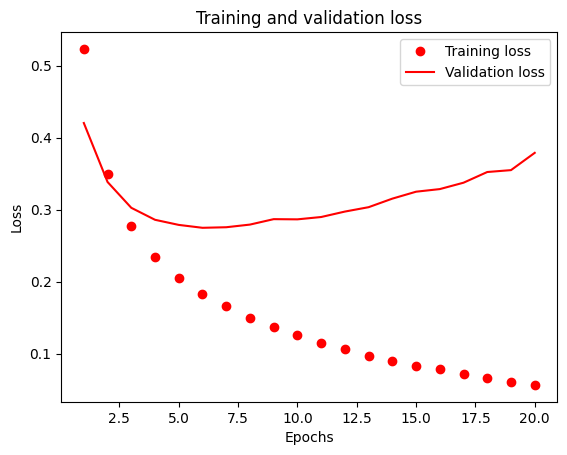

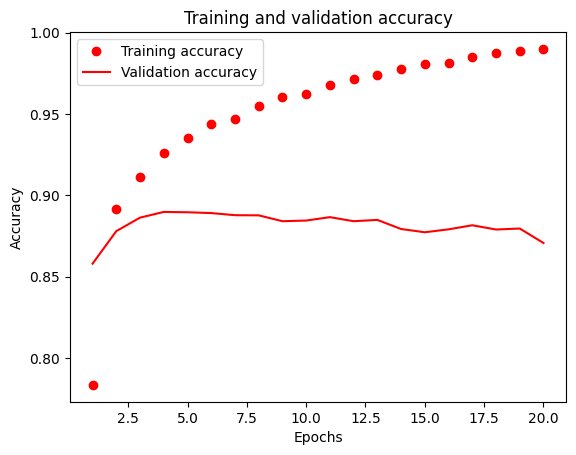

In [29]:
import matplotlib.pyplot as plt
history_dict1 = history1_layer.history
loss_value1 = history_dict1["loss"]
val_loss_value1 = history_dict1["val_loss"]
epochs1 = range(1, len(loss_value1) + 1)

#Plotting graph of Training and Validation loss
plt.plot(epochs1, loss_value1, "ro", label="Training loss")
plt.plot(epochs1, val_loss_value1, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#Plotting graph of Training and Validation Accuracy
plt.clf()
accuracy1 = history_dict1["accuracy"]
val_accuracy1 = history_dict1["val_accuracy"]
plt.plot(epochs1, accuracy1, "ro", label="Training accuracy")
plt.plot(epochs1, val_accuracy1, "r", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [30]:
model_1_layer = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_1_layer.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_1_layer.fit(x_train, y_train, epochs=5, batch_size=512)
result_1_layer = model_1_layer.evaluate(x_test, y_test)

Epoch 1/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.7439 - loss: 0.5460
Epoch 2/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9001 - loss: 0.3071
Epoch 3/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9196 - loss: 0.2397
Epoch 4/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9299 - loss: 0.2063
Epoch 5/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.9377 - loss: 0.1838
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8844 - loss: 0.2814


In [31]:
print(result_1_layer)

#The loss on the test set is 0.281, and the accuracy is 88.6%.

[0.28104090690612793, 0.8861200213432312]


In [32]:
model_1_layer.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.2198437 ],
       [0.99971586],
       [0.81552786],
       ...,
       [0.07554558],
       [0.08840486],
       [0.49860814]], dtype=float32)

#Building a neural network with 3 hidden layers

In [33]:

model_3_layers = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_3_layers.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
x_val3 = x_train[:10000]
partial_x_train = x_train[10000:]

y_val3 = y_train[:10000]
partial_y_train = y_train[10000:]

history_3_layers = model_3_layers.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val3, y_val3))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.6548 - loss: 0.6396 - val_accuracy: 0.8381 - val_loss: 0.4562
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - accuracy: 0.8875 - loss: 0.3826 - val_accuracy: 0.8745 - val_loss: 0.3386
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.9217 - loss: 0.2619 - val_accuracy: 0.8814 - val_loss: 0.2984
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9387 - loss: 0.1987 - val_accuracy: 0.8617 - val_loss: 0.3378
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9471 - loss: 0.1616 - val_accuracy: 0.8866 - val_loss: 0.2826
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9602 - loss: 0.1312 - val_accuracy: 0.8854 - val_loss: 0.2899
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9646 - loss: 0.1139 - val_accuracy: 0.8827 - val_loss: 0.3052
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9758 - loss: 0.0883 - val_accuracy: 0.8821 - v

In [34]:
history_dict_3 = history_3_layers.history
history_dict_3.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

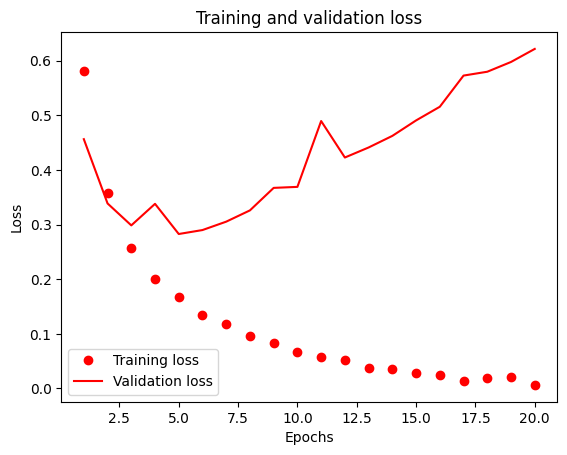

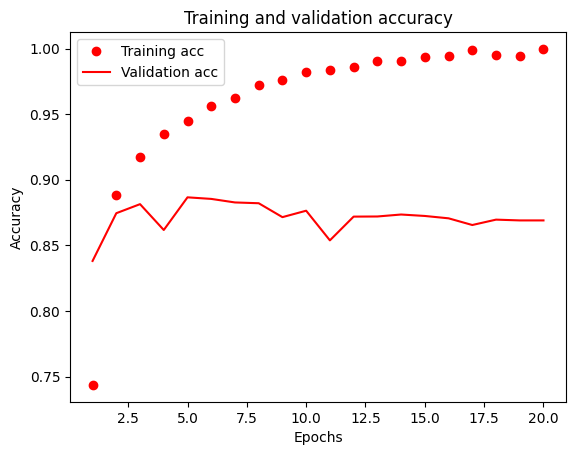

In [35]:
loss_val3 = history_dict_3["loss"]
val_loss_val3 = history_dict_3["val_loss"]
epochs3 = range(1, len(loss_val3) + 1)
plt.plot(epochs3, loss_val3, "ro", label="Training loss")
plt.plot(epochs3, val_loss_val3, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


plt.clf()
accuracy3 = history_dict_3["accuracy"]
val_accuracy3 = history_dict_3["val_accuracy"]
plt.plot(epochs3, accuracy3, "ro", label="Training acc")
plt.plot(epochs3, val_accuracy3, "r", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [36]:
model_3_layers = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


model_3_layers.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_3_layers.fit(x_train, y_train, epochs=3, batch_size=512)
results_3_layers = model_3_layers.evaluate(x_test, y_test)

Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.7315 - loss: 0.5780
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8967 - loss: 0.2956
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9195 - loss: 0.2201
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8821 - loss: 0.2932


In [37]:
print(results_3_layers)

[0.2906394600868225, 0.8840399980545044]


In [38]:
model_3_layers.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.2767251 ],
       [0.998459  ],
       [0.91968274],
       ...,
       [0.17543466],
       [0.16112837],
       [0.68353915]], dtype=float32)

As the number of layers in the model rises, its accuracy does not increase substantially. But the three-layer model is more accurate than the other two.
One of the most important steps in designing your neural network's overall architecture is deciding how many units to put in the hidden layers.
Despite not interacting with the external world right away, these layers have a big influence on the outcome.


Building Neural Network with 32 units & 3 layers.

In [39]:


model_32_units = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
#model compilation
model_32_units.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
#model validation
x_val_32 = x_train[:10000]
partial_x_train = x_train[10000:]

y_val_32 = y_train[:10000]
partial_y_train = y_train[10000:]


history_32_units = model_32_units.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val_32, y_val_32))


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.6463 - loss: 0.6288 - val_accuracy: 0.8317 - val_loss: 0.4180
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.8740 - loss: 0.3386 - val_accuracy: 0.8555 - val_loss: 0.3421
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9254 - loss: 0.2173 - val_accuracy: 0.8575 - val_loss: 0.3505
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - accuracy: 0.9238 - loss: 0.2015 - val_accuracy: 0.8844 - val_loss: 0.2846
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.9511 - loss: 0.1450 - val_accuracy: 0.8840 - val_loss: 0.2925
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9670 - loss: 0.1099 - val_accuracy: 0.8851 - val_loss: 0.3154
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9731 - loss: 0.0898 - val_accuracy: 0.8757 - val_loss: 0.3620
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9790 - loss: 0.0753 - val_accuracy: 0.8764 - v

In [40]:
history_dict_32 = history_32_units.history
history_dict_32.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

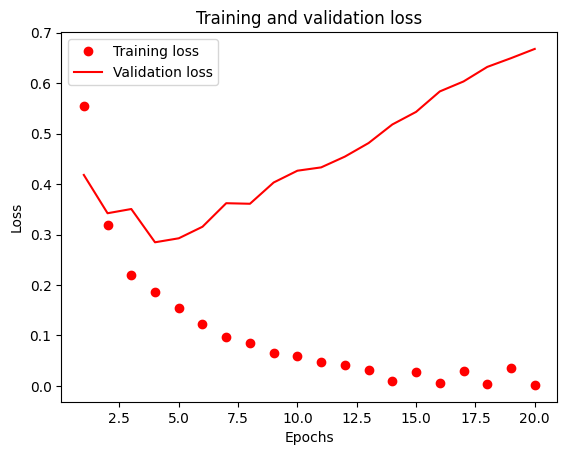

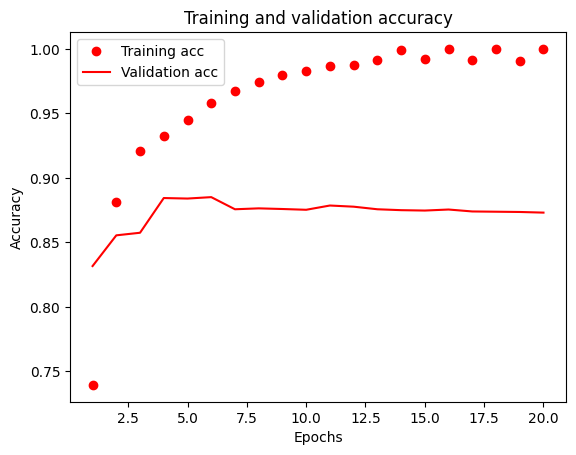

In [41]:
loss_value_32 = history_dict_32["loss"]
val_loss_value_32 = history_dict_32["val_loss"]
epochs_32 = range(1, len(loss_value_32) + 1)
plt.plot(epochs_32, loss_value_32, "ro", label="Training loss")
plt.plot(epochs_32, val_loss_value_32, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


plt.clf()
accuracy_32 = history_dict_32["accuracy"]
val_accuracy_32 = history_dict_32["val_accuracy"]
plt.plot(epochs_32, accuracy_32, "ro", label="Training acc")
plt.plot(epochs_32, val_accuracy_32, "r", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [42]:
history_32_units = model_32_units.fit(x_train, y_train, epochs=3, batch_size=512)
results_32_units = model_32_units.evaluate(x_test, y_test)
results_32_units

Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9394 - loss: 0.2515
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9673 - loss: 0.1090
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9784 - loss: 0.0729
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8639 - loss: 0.4227


[0.41744735836982727, 0.8682399988174438]

In [43]:
model_32_units.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.02454048],
       [0.9999917 ],
       [0.1666964 ],
       ...,
       [0.08030405],
       [0.02261499],
       [0.7521269 ]], dtype=float32)

 validation set accuracy = 86.8%

 Having the model with 64 units & 2 layers.

In [44]:
model_64_units = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_64_units.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
# validation
x_val_64 = x_train[:10000]
partial_x_train = x_train[10000:]

y_val_64 = y_train[:10000]
partial_y_train = y_train[10000:]

history_64 = model_64_units.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val_64, y_val_64))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - accuracy: 0.6698 - loss: 0.5902 - val_accuracy: 0.7546 - val_loss: 0.5008
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - accuracy: 0.8711 - loss: 0.3246 - val_accuracy: 0.8635 - val_loss: 0.3233
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.9090 - loss: 0.2390 - val_accuracy: 0.8907 - val_loss: 0.2746
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.9360 - loss: 0.1822 - val_accuracy: 0.8853 - val_loss: 0.2774
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.9506 - loss: 0.1402 - val_accuracy: 0.8678 - val_loss: 0.3343
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.9623 - loss: 0.1145 - val_accuracy: 0.8852 - val_loss: 0.3020
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.9669 - loss: 0.0967 - val_accuracy: 0.8846 - val_loss: 0.3173
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.9804 - loss: 0.0706 - val_accuracy: 0.8785 - 

In [45]:
history_dict_64 = history_64.history
history_dict_64.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

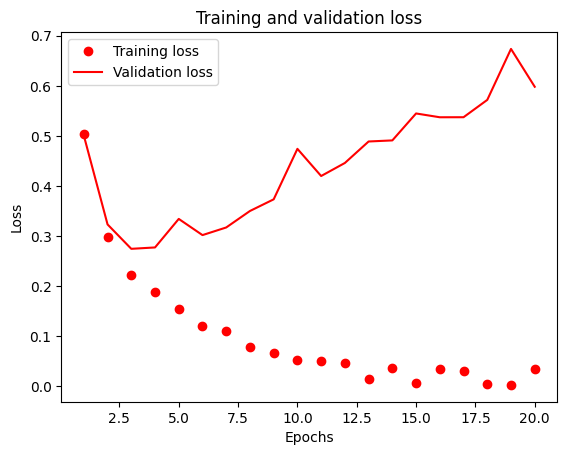

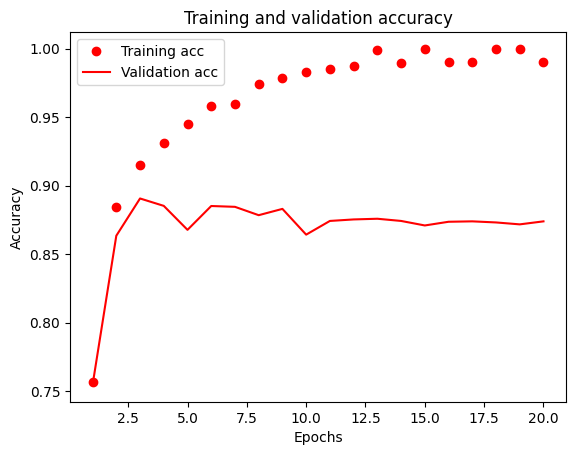

In [46]:
loss_value64 = history_dict_64["loss"]
val_loss_value64 = history_dict_64["val_loss"]
epochs_64 = range(1, len(loss_value64) + 1)
plt.plot(epochs_64, loss_value64, "ro", label="Training loss")
plt.plot(epochs_64, val_loss_value64, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
accuracy_64 = history_dict_64["accuracy"]
val_accuracy_64 = history_dict_64["val_accuracy"]
plt.plot(epochs_64, accuracy_64, "ro", label="Training acc")
plt.plot(epochs_64, val_accuracy_64, "r", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [47]:
history_64 = model_64_units.fit(x_train, y_train, epochs=3, batch_size=512)
results_64_units = model_64_units.evaluate(x_test, y_test)
results_64_units

Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.9447 - loss: 0.2067
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.9676 - loss: 0.0999
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.9826 - loss: 0.0602
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8631 - loss: 0.4228


[0.41841745376586914, 0.867680013179779]

In [48]:
model_64_units.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


array([[0.01361237],
       [0.9999981 ],
       [0.65278405],
       ...,
       [0.10003409],
       [0.01202768],
       [0.92943764]], dtype=float32)

 validation set accuracy = 86.76%

Training the model with 128 units & 3 layers

In [49]:

model_128units = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_128units.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
# validation
x_val_128 = x_train[:10000]
partial_x_train = x_train[10000:]

y_val_128 = y_train[:10000]
partial_y_train = y_train[10000:]

history_128 = model_128units.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val_128, y_val_128))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 122ms/step - accuracy: 0.6260 - loss: 0.6201 - val_accuracy: 0.8583 - val_loss: 0.3585
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 144ms/step - accuracy: 0.8710 - loss: 0.3194 - val_accuracy: 0.8492 - val_loss: 0.3504
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.9139 - loss: 0.2271 - val_accuracy: 0.8893 - val_loss: 0.2702
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.9377 - loss: 0.1704 - val_accuracy: 0.8773 - val_loss: 0.3160
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.9516 - loss: 0.1264 - val_accuracy: 0.8836 - val_loss: 0.2928
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 126ms/step - accuracy: 0.9767 - loss: 0.0750 - val_accuracy: 0.8844 - val_loss: 0.3209
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.9800 - loss: 0.0606 - val_accuracy: 0.8848 - val_loss: 0.3913
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.9890 - loss: 0.0417 - val_accuracy: 0.8835

In [50]:
history_dict_128 = history_128.history
history_dict_128.keys()



dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

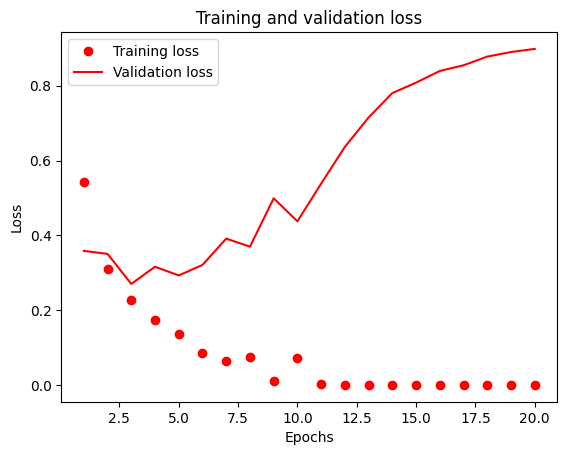

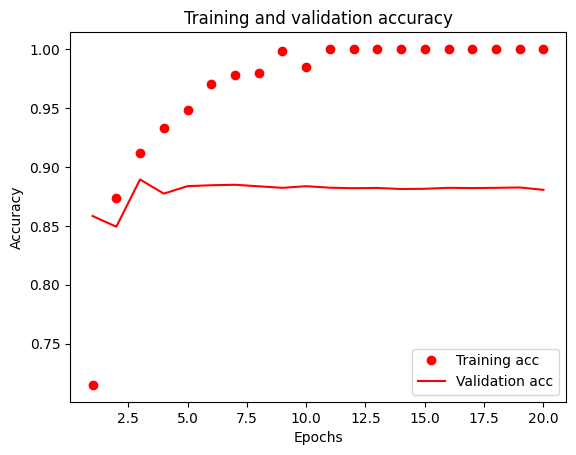

In [51]:
loss_value128 = history_dict_128["loss"]
val_loss_value128 = history_dict_128["val_loss"]
epochs_128 = range(1, len(loss_value128) + 1)
plt.plot(epochs_128, loss_value128, "ro", label="Training loss")
plt.plot(epochs_128, val_loss_value128, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


plt.clf()
accuracy_128 = history_dict_128["accuracy"]
val_accuracy_128 = history_dict_128["val_accuracy"]
plt.plot(epochs_128, accuracy_128, "ro", label="Training acc")
plt.plot(epochs_128, val_accuracy_128, "r", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [52]:
history_128 = model_128units.fit(x_train, y_train, epochs=2, batch_size=512)
results_128_units = model_128units.evaluate(x_test, y_test)
results_128_units

Epoch 1/2
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.9285 - loss: 0.3813
Epoch 2/2
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - accuracy: 0.9734 - loss: 0.0810
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8447 - loss: 0.4748


[0.4660511612892151, 0.8469600081443787]

In [53]:
model_128units.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


array([[0.05219187],
       [1.        ],
       [0.9969469 ],
       ...,
       [0.06484652],
       [0.03054392],
       [0.96891093]], dtype=float32)

MSE Loss Function model with 16 units and 3-layers

In [54]:

MSE_model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
# compilation of model
MSE_model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
# validation of model
x_val_MSE = x_train[:10000]
partial_x_train = x_train[10000:]

y_val_MSE = y_train[:10000]
partial_y_train = y_train[10000:]
# Model Fit

history_MSE = MSE_model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val_MSE, y_val_MSE))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.6388 - loss: 0.2290 - val_accuracy: 0.8430 - val_loss: 0.1470
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8685 - loss: 0.1269 - val_accuracy: 0.8725 - val_loss: 0.1025
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9117 - loss: 0.0808 - val_accuracy: 0.8591 - val_loss: 0.1026
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9170 - loss: 0.0688 - val_accuracy: 0.8850 - val_loss: 0.0869
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9359 - loss: 0.0555 - val_accuracy: 0.8832 - val_loss: 0.0855
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9556 - loss: 0.0428 - val_accuracy: 0.8841 - val_loss: 0.0838
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9585 - loss: 0.0395 - val_accuracy: 0.8824 - val_loss: 0.0862
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.9671 - loss: 0.0333 - val_accuracy: 0.8770 - v

In [55]:
historydict_MSE = history_MSE.history
historydict_MSE.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

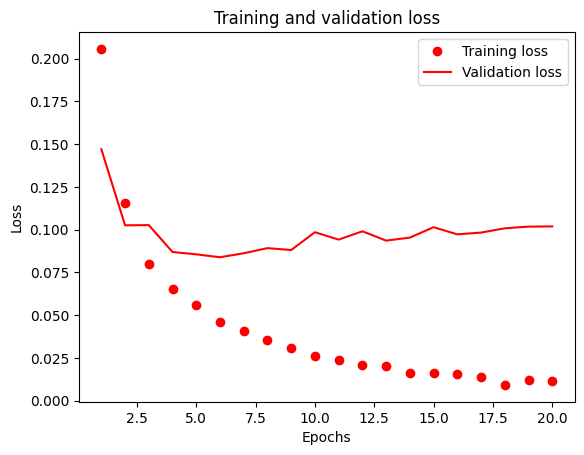

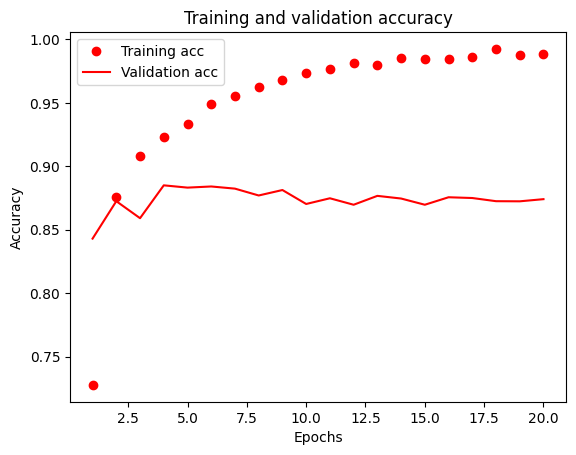

In [56]:
import matplotlib.pyplot as plt
loss_value_MSE = historydict_MSE["loss"]
val_loss_value_MSE = historydict_MSE["val_loss"]
epochs_MSE = range(1, len(loss_value_MSE) + 1)
plt.plot(epochs_MSE, loss_value_MSE, "ro", label="Training loss")
plt.plot(epochs_MSE, val_loss_value_MSE, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


plt.clf()
acc_MSE = historydict_MSE["accuracy"]
val_acc_MSE = historydict_MSE["val_accuracy"]
plt.plot(epochs_MSE, acc_MSE, "ro", label="Training acc")
plt.plot(epochs_MSE, val_acc_MSE, "r", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [57]:
MSE_model.fit(x_train, y_train, epochs=8, batch_size=512)
results_MSE = MSE_model.evaluate(x_test, y_test)
results_MSE

Epoch 1/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9443 - loss: 0.0464
Epoch 2/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9576 - loss: 0.0374
Epoch 3/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9674 - loss: 0.0296
Epoch 4/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9697 - loss: 0.0281
Epoch 5/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9762 - loss: 0.0237
Epoch 6/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9806 - loss: 0.0194
Epoch 7/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9773 - loss: 0.0218
Epoch 8/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9816 - loss: 0.0191
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8632 - loss: 0.1133


[0.11128326505422592, 0.865880012512207]

In [58]:
MSE_model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


array([[0.01527994],
       [0.9999493 ],
       [0.22593687],
       ...,
       [0.02873159],
       [0.01274641],
       [0.15625429]], dtype=float32)

In [59]:

tanh = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

tanh.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

x_val_tanh = x_train[:10000]
partial_x_train = x_train[10000:]

y_val_tanh = y_train[:10000]
partial_y_train = y_train[10000:]


historytanh_model = tanh.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val_tanh, y_val_tanh))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.6925 - loss: 0.2052 - val_accuracy: 0.8671 - val_loss: 0.1235
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.8957 - loss: 0.1048 - val_accuracy: 0.8850 - val_loss: 0.1001
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9160 - loss: 0.0794 - val_accuracy: 0.8879 - val_loss: 0.0909
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9343 - loss: 0.0655 - val_accuracy: 0.8893 - val_loss: 0.0865
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.9382 - loss: 0.0585 - val_accuracy: 0.8900 - val_loss: 0.0849
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9499 - loss: 0.0506 - val_accuracy: 0.8825 - val_loss: 0.0856
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9556 - loss: 0.0452 - val_accuracy: 0.8836 - val_loss: 0.0866
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9598 - loss: 0.0422 - val_accuracy: 0.8815 - v

In [60]:
historydict_tanh = historytanh_model.history
historydict_tanh.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

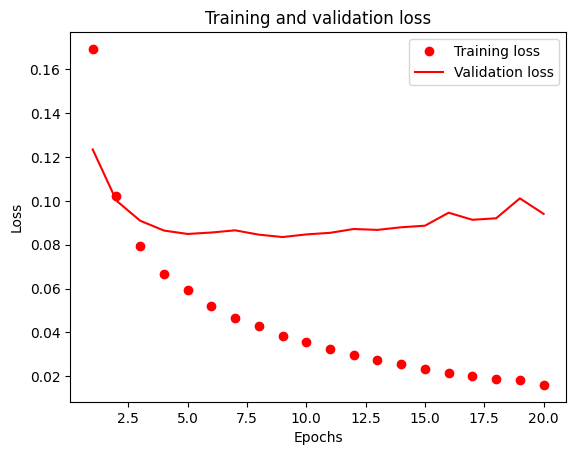

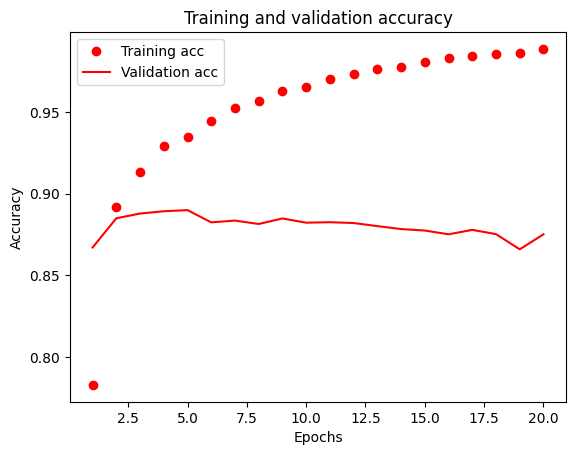

In [61]:
loss_value_tanh= historydict_tanh["loss"]
val_loss_value_tanh = historydict_tanh["val_loss"]
epochs_tanh = range(1, len(loss_value_tanh) + 1)
plt.plot(epochs_tanh, loss_value_tanh, "ro", label="Training loss")
plt.plot(epochs_tanh, val_loss_value_tanh, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc_tanh = historydict_tanh["accuracy"]
val_acc_tanh = historydict_tanh["val_accuracy"]
plt.plot(epochs_tanh, acc_tanh, "ro", label="Training acc")
plt.plot(epochs_tanh, val_acc_tanh, "r", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [62]:
tanh.fit(x_train, y_train, epochs=8, batch_size=512)
results_tanh = tanh.evaluate(x_test, y_test)
results_tanh

Epoch 1/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9453 - loss: 0.0455
Epoch 2/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9566 - loss: 0.0378
Epoch 3/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9630 - loss: 0.0340
Epoch 4/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9644 - loss: 0.0329
Epoch 5/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9695 - loss: 0.0295
Epoch 6/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9728 - loss: 0.0267
Epoch 7/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9764 - loss: 0.0252
Epoch 8/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9746 - loss: 0.0252
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8635 - loss: 0.1075


[0.10479795932769775, 0.8672000169754028]

Adam Operator with 16 units and 3-layers

In [63]:


adam = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
     layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

adam.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

x_adam = x_train[:10000]
partial_x_train = x_train[10000:]

y_adam = y_train[:10000]
partial_y_train = y_train[10000:]


historyadam = adam.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_adam, y_adam))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.6545 - loss: 0.6588 - val_accuracy: 0.8385 - val_loss: 0.4815
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.8815 - loss: 0.3937 - val_accuracy: 0.8799 - val_loss: 0.3000
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9268 - loss: 0.2141 - val_accuracy: 0.8885 - val_loss: 0.2762
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9543 - loss: 0.1463 - val_accuracy: 0.8854 - val_loss: 0.2922
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9717 - loss: 0.1018 - val_accuracy: 0.8828 - val_loss: 0.3238
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.9816 - loss: 0.0721 - val_accuracy: 0.8818 - val_loss: 0.3569
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.9900 - loss: 0.0462 - val_accuracy: 0.8773 - val_loss: 0.4005
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9956 - loss: 0.0316 - val_accuracy: 0.8738 - v

In [64]:
historydict_adam = historyadam.history
historydict_adam.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

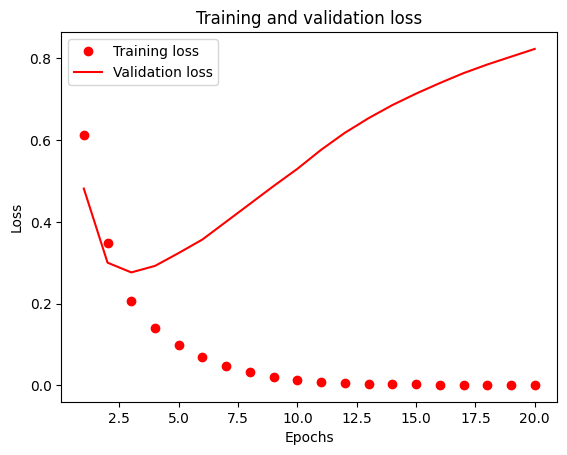

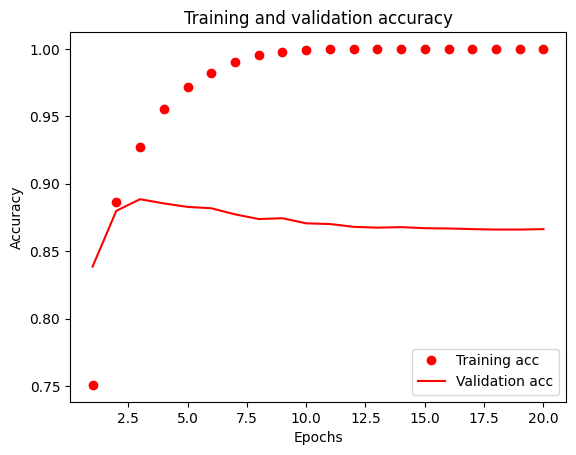

In [65]:
loss_value_adam = historydict_adam["loss"]
val_loss_value_adam = historydict_adam["val_loss"]
epochs_adam = range(1, len(loss_value_adam) + 1)
plt.plot(epochs_adam, loss_value_adam, "ro", label="Training loss")
plt.plot(epochs_adam, val_loss_value_adam, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


plt.clf()
acc_adam = historydict_adam["accuracy"]
val_acc_adam = historydict_adam["val_accuracy"]
plt.plot(epochs_adam, acc_adam, "ro", label="Training acc")
plt.plot(epochs_adam, val_acc_adam, "r", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [66]:
adam.fit(x_train, y_train, epochs=4, batch_size=512)
results_adam = adam.evaluate(x_test, y_test)
results_adam

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9403 - loss: 0.2866
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.9646 - loss: 0.1183
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.9809 - loss: 0.0761
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9886 - loss: 0.0546
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8549 - loss: 0.5162


[0.511245608329773, 0.8566399812698364]

Regularization model with 16 units and 2-layers

In [67]:
#Regularization

from tensorflow.keras import regularizers
regularization = keras.Sequential([
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1, activation="sigmoid")
])
regularization.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history_regularization = regularization.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
historydict_regularization = history_regularization.history
historydict_regularization.keys()

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.6777 - loss: 0.6583 - val_accuracy: 0.8539 - val_loss: 0.4788
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.8911 - loss: 0.4111 - val_accuracy: 0.8702 - val_loss: 0.3935
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9187 - loss: 0.3163 - val_accuracy: 0.8748 - val_loss: 0.3662
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9267 - loss: 0.2742 - val_accuracy: 0.8686 - val_loss: 0.3714
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9370 - loss: 0.2432 - val_accuracy: 0.8832 - val_loss: 0.3453
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9491 - loss: 0.2203 - val_accuracy: 0.8843 - val_loss: 0.3375
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9603 - loss: 0.1953 - val_accuracy: 0.8798 - val_loss: 0.3615
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9570 - loss: 0.1963 - val_accuracy: 0.8670 - v

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

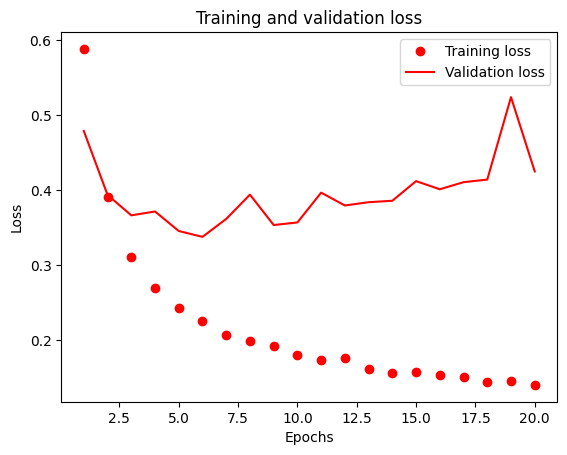

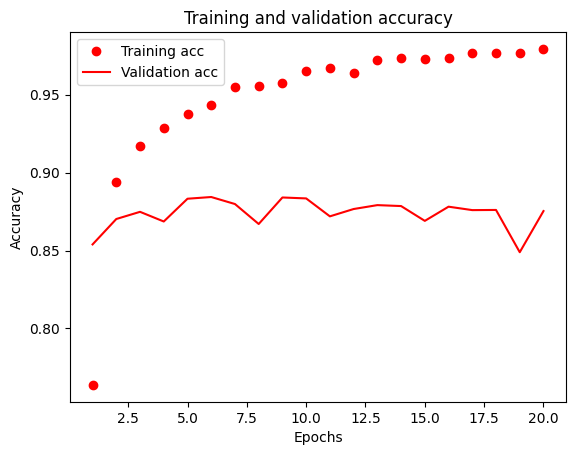

In [68]:
loss_valu = historydict_regularization["loss"]
val_loss_value_r = historydict_regularization["val_loss"]
epochs_r = range(1, len(loss_valu) + 1)
plt.plot(epochs_r, loss_valu, "ro", label="Training loss")
plt.plot(epochs_r, val_loss_value_r, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc_r = historydict_regularization["accuracy"]
val_acc_r = historydict_regularization["val_accuracy"]
plt.plot(epochs_r, acc_r, "ro", label="Training acc")
plt.plot(epochs_r, val_acc_r, "r", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [69]:
regularization.fit(x_train, y_train, epochs=8, batch_size=512)
results_regularization = regularization.evaluate(x_test, y_test)
results_regularization

Epoch 1/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9392 - loss: 0.2499
Epoch 2/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9466 - loss: 0.2128
Epoch 3/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9580 - loss: 0.1854
Epoch 4/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9621 - loss: 0.1767
Epoch 5/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9622 - loss: 0.1731
Epoch 6/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9615 - loss: 0.1764
Epoch 7/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9685 - loss: 0.1613
Epoch 8/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9668 - loss: 0.1617
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8399 - loss: 0.5382


[0.5379931330680847, 0.8401200175285339]

Dropout function with 16 units and 3-layers

In [70]:
#Dropout
from tensorflow.keras import regularizers
Dropout = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
Dropout.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history_Dropout = Dropout.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
historydict_Dropout = history_Dropout.history
historydict_Dropout.keys()

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.5254 - loss: 0.6887 - val_accuracy: 0.8059 - val_loss: 0.6301
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.6190 - loss: 0.6373 - val_accuracy: 0.8463 - val_loss: 0.5310
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.7003 - loss: 0.5579 - val_accuracy: 0.8713 - val_loss: 0.4268
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.7648 - loss: 0.4933 - val_accuracy: 0.8800 - val_loss: 0.3566
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8170 - loss: 0.4309 - val_accuracy: 0.8750 - val_loss: 0.3273
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8429 - loss: 0.3941 - val_accuracy: 0.8853 - val_loss: 0.2987
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8777 - loss: 0.3407 - val_accuracy: 0.8872 - val_loss: 0.2847
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8837 - loss: 0.3077 - val_accuracy: 0.8848 - v

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

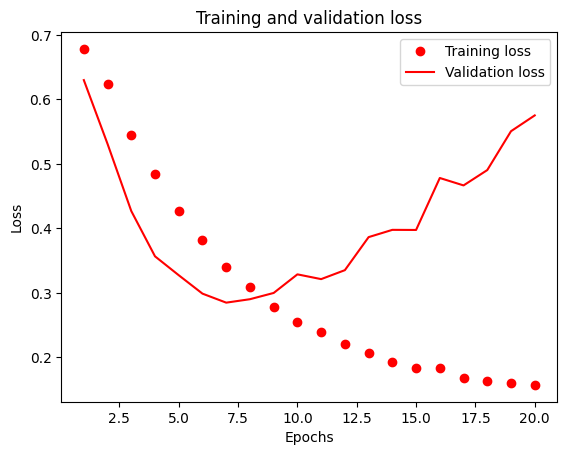

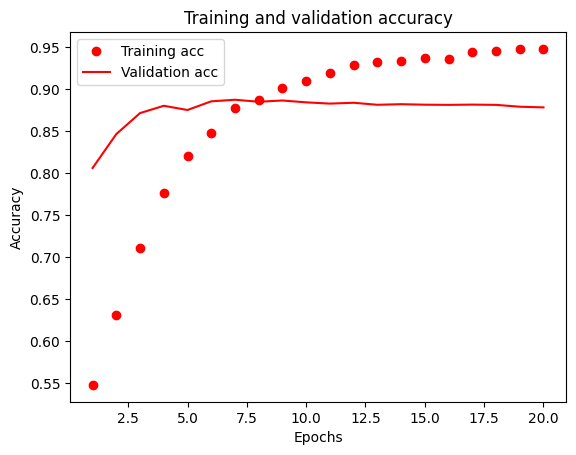

In [71]:
loss_val = historydict_Dropout["loss"]
val_loss_val_d = historydict_Dropout["val_loss"]
epochs_d = range(1, len(loss_val) + 1)
plt.plot(epochs_d, loss_val, "ro", label="Training loss")
plt.plot(epochs_d, val_loss_val_d, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


plt.clf()
acc_d = historydict_Dropout["accuracy"]
val_acc_d = historydict_Dropout["val_accuracy"]
plt.plot(epochs_d, acc_d, "ro", label="Training acc")
plt.plot(epochs_d, val_acc_d, "r", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [72]:
Dropout.fit(x_train, y_train, epochs=8, batch_size=512)
results_Dropout = Dropout.evaluate(x_test, y_test)
results_Dropout

Epoch 1/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.9013 - loss: 0.3262
Epoch 2/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.9055 - loss: 0.2848
Epoch 3/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9141 - loss: 0.2544
Epoch 4/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.9257 - loss: 0.2328
Epoch 5/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9279 - loss: 0.2103
Epoch 6/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9291 - loss: 0.2087
Epoch 7/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9342 - loss: 0.2028
Epoch 8/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9386 - loss: 0.1868
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8737 - loss: 0.4746


[0.4621775448322296, 0.8718000054359436]

Training model with hyper tuned parameters with 32 units and 3 -layers

In [73]:
#Training model with hyper tuned parameters

from tensorflow.keras import regularizers
Hyper = keras.Sequential([
    layers.Dense(32, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(32, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
Hyper.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

history_Hyper = Hyper.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dictHyper = history_Hyper.history
history_dictHyper.keys()

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.5432 - loss: 0.2578 - val_accuracy: 0.8194 - val_loss: 0.2199
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.7123 - loss: 0.2145 - val_accuracy: 0.8595 - val_loss: 0.1514
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.8004 - loss: 0.1671 - val_accuracy: 0.8724 - val_loss: 0.1205
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8566 - loss: 0.1338 - val_accuracy: 0.8799 - val_loss: 0.1034
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.8799 - loss: 0.1129 - val_accuracy: 0.8820 - val_loss: 0.0990
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9065 - loss: 0.0936 - val_accuracy: 0.8871 - val_loss: 0.0971
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.9152 - loss: 0.0846 - val_accuracy: 0.8871 - val_loss: 0.0992
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9271 - loss: 0.0764 - val_accuracy: 0.8838 - 

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

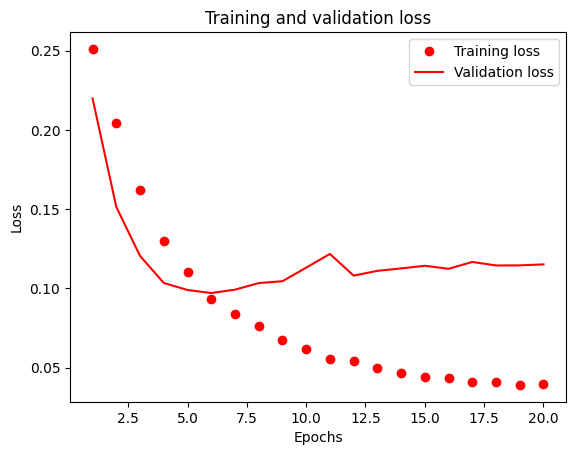

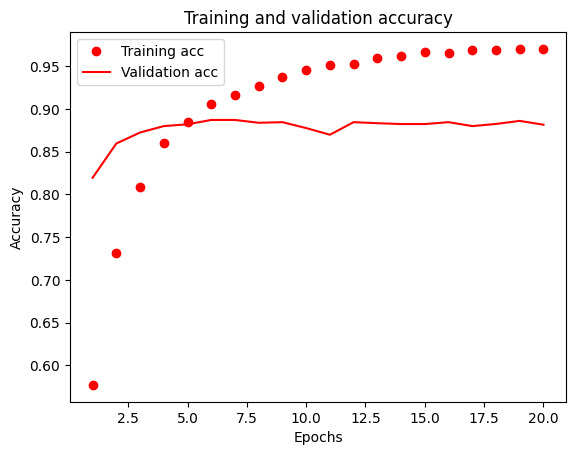

In [74]:
loss_va_h = history_dictHyper["loss"]
val_loss_va_h = history_dictHyper["val_loss"]
epochs_h = range(1, len(loss_va_h) + 1)
plt.plot(epochs_h, loss_va_h, "ro", label="Training loss")
plt.plot(epochs_h, val_loss_va_h, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


plt.clf()
acc_h = history_dictHyper["accuracy"]
val_acc_h = history_dictHyper["val_accuracy"]
plt.plot(epochs_h, acc_h, "ro", label="Training acc")
plt.plot(epochs_h, val_acc_h, "r", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [75]:
Hyper.fit(x_train, y_train, epochs=8, batch_size=512)
results_Hyper = Hyper.evaluate(x_test, y_test)
results_Hyper

Epoch 1/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9303 - loss: 0.0717
Epoch 2/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9372 - loss: 0.0664
Epoch 3/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9433 - loss: 0.0606
Epoch 4/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9494 - loss: 0.0557
Epoch 5/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9498 - loss: 0.0552
Epoch 6/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.9526 - loss: 0.0522
Epoch 7/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9576 - loss: 0.0485
Epoch 8/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9595 - loss: 0.0470
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8800 - loss: 0.1156


[0.11344082653522491, 0.8822000026702881]

In [76]:
#Summary
Models_Loss= np.array([results_Dropout[0],results_Hyper[0],results_MSE[0],results_regularization[0],results_tanh[0]])*100
Models_Loss
Models_Accuracy= np.array([results_Dropout[1],results_Hyper[1],results_MSE[1],results_regularization[1],results_tanh[1]])*100
Models_Accuracy
Labels=['Model_Dropout','Model_Hyper','Model_MSE','model_regularization','model_tanh']
plt.clf()

<Figure size 640x480 with 0 Axes>

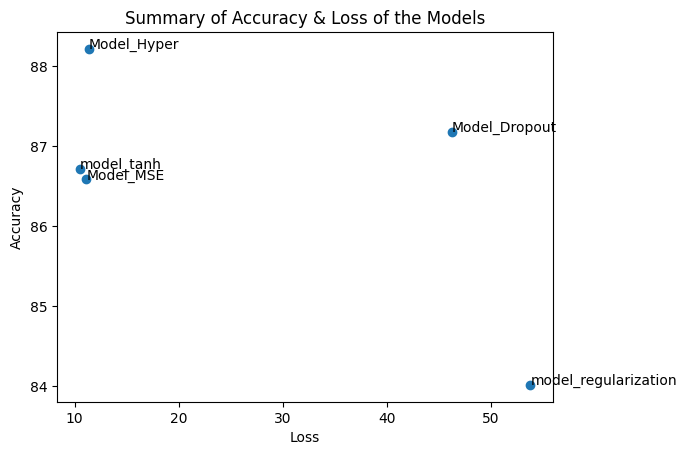

In [77]:
#Compilation

fig, ax = plt.subplots()
ax.scatter(Models_Loss,Models_Accuracy)
for i, txt in enumerate(Labels):
    ax.annotate(txt, (Models_Loss[i],Models_Accuracy[i] ))
plt.title("Summary of Accuracy & Loss of the Models")
plt.ylabel("Accuracy")
plt.xlabel("Loss")

plt.show()

First, Data had to be imported, review analysis parameters had to be adjusted, and binary crossentropy and relu activation had to be used to build a basic neural network with a single 16-unit hidden layer. More study was done to enhance the performance of the model. This involved adjusting the number of hidden levels (one to three) and units per layer (32, 64, and 128). Overfitting was a risk, even though accuracy was often improved by increasing the number of hidden units. Moreover, replacing binary crossentropy with mean squared error (MSE) loss did not significantly alter the model's performance. Overall, the findings suggested that choosing the appropriate loss functions and preventing overfitting required careful consideration, even though adjusting the architecture and parameters may increase accuracy.
